# SysML v2 MBSE Methodologies JupyterBook<a name="sysmlv2modmethodologies"></a>

*Last update: May 26th, 2022*

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

* [SYSMOD with SysML v2](#sysmlv2sysmod)
  * [Problem Statement, System Idea and System Objectives](#sysmlv2sysmodproblemideaobjectives)
  * [Base Architecture](#sysmlv2sysmodba)
  * [SYSMOD Language Extension Library](#sysmodlibrary)
  * [The Complete FFDS System Example](#sysmlv2ffds)
  
* [FAS with SysML v2](#sysmlv2fas)
* [VAMOS (Variant Modeling with SysML v2](#sysmlv2vamos)

## How to use this notebook

First, execcute the [SYSMOD library](#sysmodlibrary) before use execute the examples. The library is used by all of them.


## SYSMOD with SysML v2<a name="sysmlv2sysmod"></a>

The example is taken from the book [SYSMOD - The Systems Modeling Toolbox](https://leanpub.com/sysmod). It is a Forest Fire Detection System (FFDS).

The following will be part of the next edition of the SYSMOD book which will cover SysML v2.


### Problem Statement, System Idea and System Objectives<a name="sysmlv2sysmodproblemideaobjectives"></a>

The language extension of SysML v2 is still under development. Until it is available, I use a simplified approach to introduce SYSMOD concepts into the language. 

In [6]:
package ForestFireDetectionSystemModel {   
	import SYSMOD::*;

	package FFDS_Core {
		
		#system ffds {
			attribute redefines problemStatement = "How can we  [...]";
			attribute redefines systemIdea = "The FFDS is a  [...]";
	  }
	 }
	 
	 package FFDS_Objectives {
	 	#systemObjective <'OBJ-B1'> 'Market Leader' {
	 		doc /* The system will make the vendor the market 
    	     * leader for forest fire detection systems.
    		   */
    }
    #systemObjective <'OBJ-S1'> 'Reliable Detection' {
      doc /* Any forest fire is detected by the system on time 
           * to start effective counteractions.
          */
    }
    #systemObjective <'OBJ-S2'> 'Affordability' {
      doc /* The system is affordable for any forest authority. */
    }                               
  }
}

Package ForestFireDetectionSystemModel (11845394-a87f-4610-8a2a-f2480300b3df)


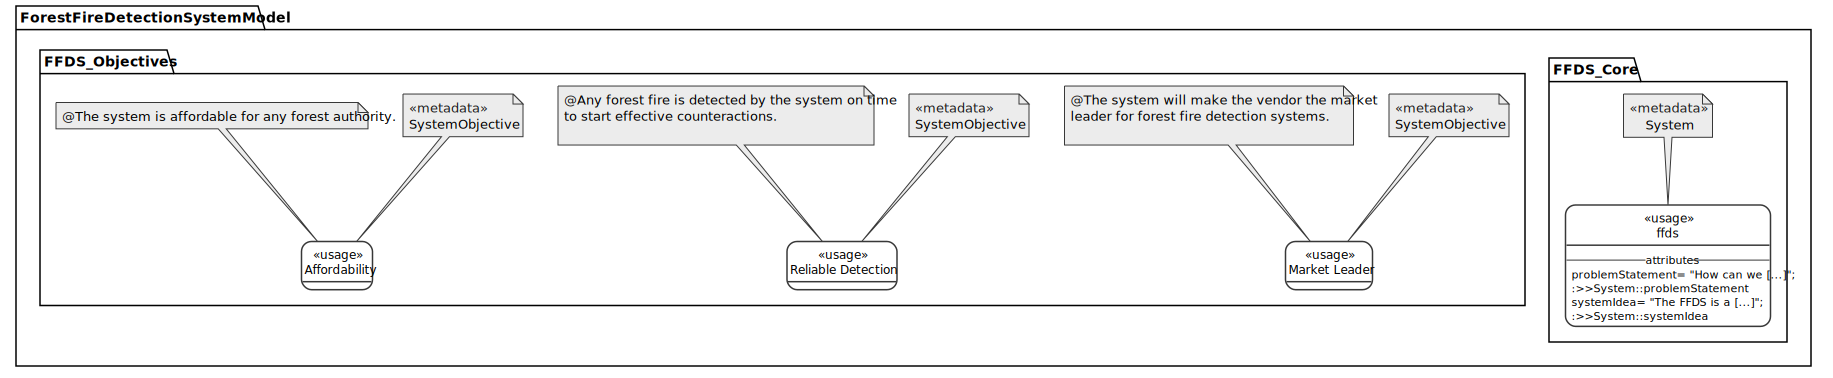

In [5]:
%viz ForestFireDetectionSystemModel

### Base Architecture<a name="sysmlv2sysmodba"></a>

The base architecture of the FFDS includes a base context.

In [10]:
package FFDS_BaseArchitecture {
	doc /* Base Architecture of the 
       * SYSMOD Forest Fire Detection System (FFDS)
       */
  
  import SYSMOD::*;
  
  #systemContext ffds_BaseArchitectureContext {          

   // External entities
   #externalObject animals[1..*] :> actors;
   connect animals to ffds_BaseArchitecture.animalPort;
   #externalObject environment :> actors;
   #externalSystem satellites [1..*] :> actors;
   connect satellites to ffds_BaseArchitecture.satPort;

   // Base Architecture		
   #system ffds_BaseArchitecture :> systemOfInterest {
     part forestFireObservationDrones[1..*];
     part sensors[1..*];
     part animalMovementSensors[1..*] :> sensors {
     	port animalPort;
     }    	
     part server {
     	port satPort;
     }
     
     port animalPort;
  	 bind animalPort = animalMovementSensors.animalPort;
    		
   	 port satPort;
   	 bind satPort = server.satPort;	 
   }
  }
}

Package FFDS_BaseArchitecture (699e4a2f-1ce0-4897-a8dc-b64ccaad87d3)


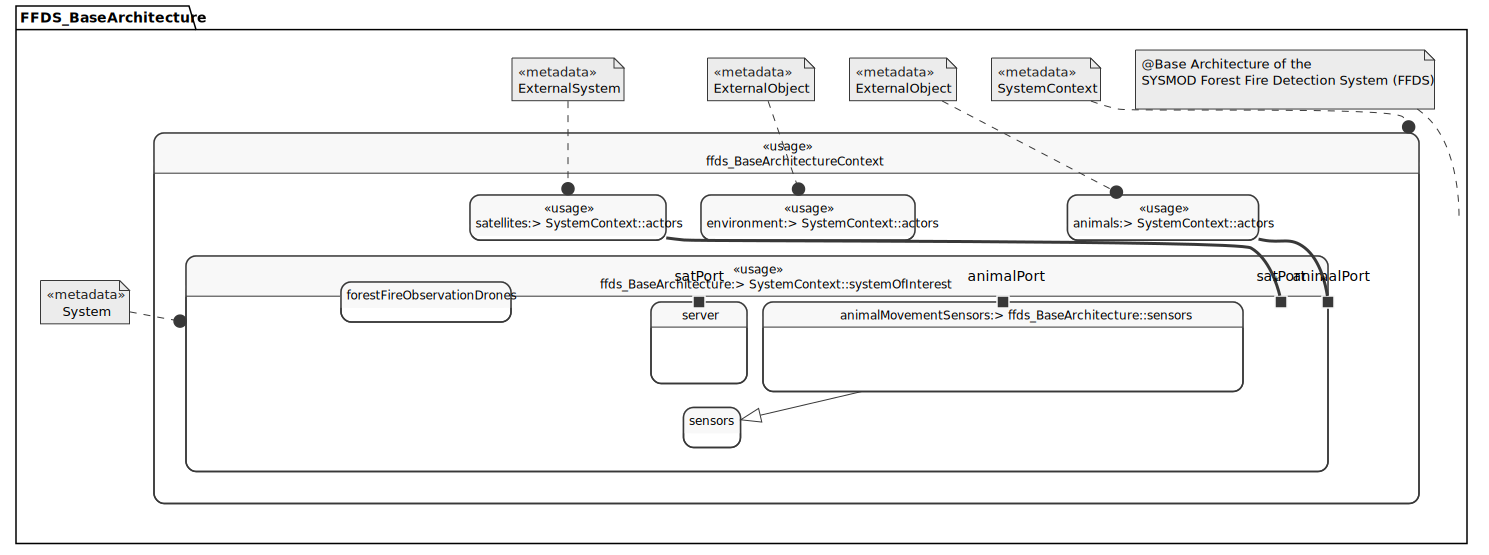

In [11]:
%viz --view=interconnection FFDS_BaseArchitecture

### System Use Cases<a name="ffdsusecases"></a>

### Use Case Activities

### Domain Model

### Quality Requirements

### Logical Architecture 

### Product Architecture

### System States

### Verify Architecture with Scenarios

### Test Cases

### SYSMOD Language Extension Library<a name="sysmodlibrary"></a>

In [1]:
package SYSMOD {
      
  doc /* SYSMOD - The Systems Modeling Toolbox, Version 5.0beta, Language Extension for SysML v2
       *
       * Copyright 2022 MBSE4U, Tim Weilkiens
       *
       * Licensed under the Apache License, Version 2.0 (the "License");
       * you may not use this file except in compliance with the License.
       * You may obtain a copy of the License at
       *
       * http://www.apache.org/licenses/LICENSE-2.0
       *
       * Unless required by applicable law or agreed to in writing, software
       * distributed under the License is distributed on an "AS IS" BASIS,
       * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
       * See the License for the specific language governing permissions and
       * limitations under the License.
       *
       */ 

	package SYSMODConcepts {
		doc /*
		     *  Definition of the SYSMOD concepts 
		     */ 

    part def System {
       	doc /* Represents an engineered system. */
        
       	attribute problemStatement : ScalarValues::String;
       	attribute systemIdea : ScalarValues::String;
    }
    part systems[*] : System;   

		requirement def Objective {
    	    doc /* A objective is an objective of the system. 
        	     * It is a special kind of a requirement that is typically not satisfied 
            	 * but is targeted by the system.
            	*/
    }
    requirement objectives[*] : Objective;
 	   	   
 		part def SystemContext {
        doc /* A system context is a wrapper around the system and it's actors 
           	 * to allow a detailed system context modeling.  
          	 */

       	part systemOfInterest :> systems;
       	part actors[0..*];
   	}
		part systemContexts[*] : SystemContext;

    // Actor categories
   	part def User;
   	part users[*] : User; 
   	part def ExternalSystem;
   	part externalSystems[*] : ExternalSystem;
   	part def MechanicalSystem :> ExternalSystem;
   	part mechanicalSystems[*] :> externalSystems;
   	part def ExternalObject;
	  part externalObjects[*] : ExternalObject;
   	part def EnvironmentalEffect;
    part environmentalEffects[*] : EnvironmentalEffect;
   	part def EnvironmentalImpact;
   	part environmentalImpacts[*] : EnvironmentalImpact;

    use case def SystemUseCase {
      doc /* The System Use Cases are a table of content of the services provided by the system to its system actors. 
           * A system use case describes a coherent interaction of an actor with the system. The interaction is initiated 
           * by a trigger. The use case returns a result that is of value for an actor or stakeholder of the system.
           */
    
    	attribute useCasetrigger : ScalarValues::String;
    	attribute useCaseResult : ScalarValues::String;
    }
    use case systemUseCases[*] : SystemUseCase;
    
    use case def ContinuousUseCase :> SystemUseCase {
      doc /* A continuous use case is a special system use case that, typically, is triggered by a state switch of the 
           * system, but could also have an external trigger. It has no final result, but continuous results. 
           */
    }
    use case continuousUseCases[*] : ContinuousUseCase;     

    action def SystemProcess {
    	doc /* The system process describes the logical execution sequence of use cases */
    } 
    action systemProcesses[*] : SystemProcess;
    
    	 
   	part def DomainItem {
   		doc /* A domain items represents an object, a concept, a location, 
   		     * or a person from the real-world domain. A domain item is directly known to the system.
   		     */ 
   	}
   	part domainItems[*] : DomainItem;
   	
   	port def UserInteractionPoint {
   	  doc /* The user interaction point contains features which describe the communication with a (human) user. 
   	       * The concept emphasizes the special character of the interface in relation to more technical interfaces.
   	       */
   	}
   	port userInteractionPoints[*] : UserInteractionPoint;  	
	}

 
  //
  // Language Extensions of the SYSMOD concepts
  //
 	metadata def <systemObjective> SystemObjective :> Metaobjects::SemanticMetadata {
  	:>> baseType = SYSMODConcepts::objectives as SysML::Usage;
 	}

	metadata def <system> System :> Metaobjects::SemanticMetadata {
 		:>> baseType = SYSMODConcepts::systems as SysML::Usage;   	
 	}

 	metadata def <systemContext> SystemContext :> Metaobjects::SemanticMetadata {
 		:>> baseType = SYSMODConcepts::systemContexts as SysML::Usage;
 	}

  metadata def <user> User :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::users as SysML::Usage;    	
  }
  metadata def <externalSystem> ExternalSystem :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::externalSystems as SysML::Usage;    	
  }
  metadata def <mechanicalSystem> MechanicalSystem :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::mechanicalSystems as SysML::Usage;    	
  }
  metadata def <externalObject> ExternalObject :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::externalObjects as SysML::Usage;    	
  }
  metadata def <environmentalEffect> EnvironmentalEffect :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::environmentalEffects as SysML::Usage;    	
  }
  metadata def <environmentalImpact> EnvironmentalImpact :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::environmentalImpacts as SysML::Usage;    	
  }		

  metadata def <systemUseCase> SystemUseCase :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::systemUseCases as SysML::Usage;    	
  }		
  metadata def <continuousUseCase> ContinuousUseCase :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::continuousUseCases as SysML::Usage;    	
  }		
  metadata def <systemProcess> SystemProcess :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::systemProcesses as SysML::Usage;    	
  }		 

  metadata def <domainItem> DomainItem :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::domainItems as SysML::Usage;    	
  }		

  metadata def <userInteractionPoint> UserInteractionPoint :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::userInteractionPoints as SysML::Usage;    	
  }		

}


package Engineering4Planet {
	attribute def Kg;

	item def PlanetImpact {
 			attribute co2 : Kg;
 			waste : ScalarValues::String;
 	}
}


Package SYSMOD (84af4294-cb22-4ce0-bccf-5c973defaeb2)
Package Engineering4Planet (2a6e081c-0002-4a01-9cbd-c9cec4a1d0cc)


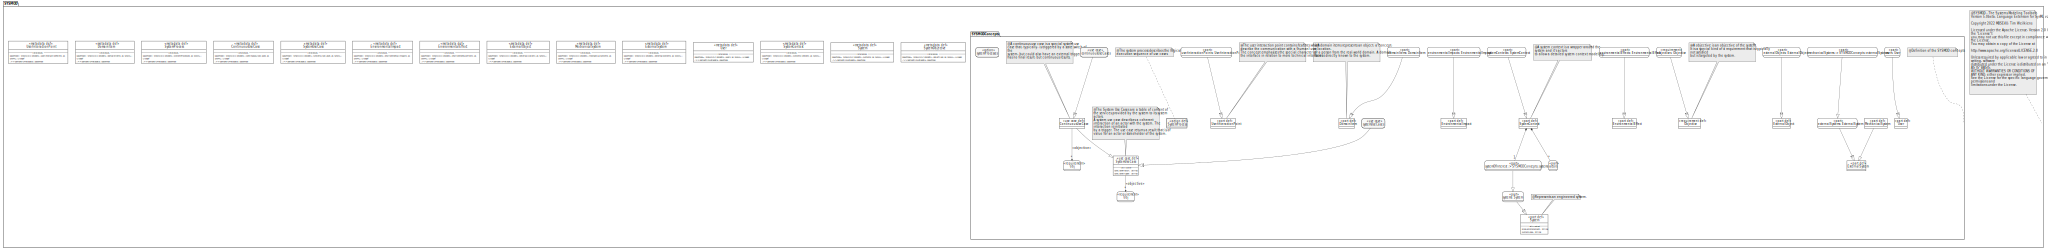

In [2]:
%viz SYSMOD

### The Complete FFDS System Example<a name="sysmlv2ffds"></a>

Below you find the complete example in a single code section.

In [17]:
package ForestFireDetectionSystemModel {   

    import SYSMOD::*;
        
    package FFDS_BaseArchitecture {
        doc /* Base Architecture of the 
             * SYSMOD Forest Fire Detection System (FFDS)
             */
        import SYSMOD::*;
  
        #systemContext ffds_BaseArchitectureContext {          
            // External entities
            #externalObject animals[1..*] :> actors;
            connect animals to ffds_BaseArchitecture.animalPort;
            #externalObject environment :> actors;
            #externalSystem satellites [1..*] :> actors;
            connect satellites to ffds_BaseArchitecture.satPort;

            // Base Architecture
            #system ffds_BaseArchitecture :> systemOfInterest {
                 part forestFireObservationDrones[1..*];
                 part sensors[1..*];
                 part animalMovementSensors[1..*] :> sensors {
                     port animalPort;
                 }    
                 part server {
                    port satPort;
                 }
     
                 port animalPort;
                 bind animalPort = animalMovementSensors.animalPort;

                 port satPort;
                 bind satPort = server.satPort;	 
            }
        }
    }
    
    package FFDS_Core {

        #system ffds {
            attribute redefines problemStatement = "How can we  [...]";
            attribute redefines systemIdea = "The FFDS is a  [...]";
        }
    }
 
    package FFDS_Objectives {
        #systemObjective <'OBJ-B1'> 'Market Leader' {
            doc /* The system will make the vendor the market 
                * leader for forest fire detection systems.
                */
        }
        #systemObjective <'OBJ-S1'> 'Reliable Detection' {
            doc /* Any forest fire is detected by the system on time 
                * to start effective counteractions.
                */
        }
        #systemObjective <'OBJ-S2'> 'Affordability' {
            doc /* The system is affordable for any forest authority. */
        }
    }
}


Package ForestFireDetectionSystemModel (735723e1-175c-4b17-ad07-8d5b3a3287be)


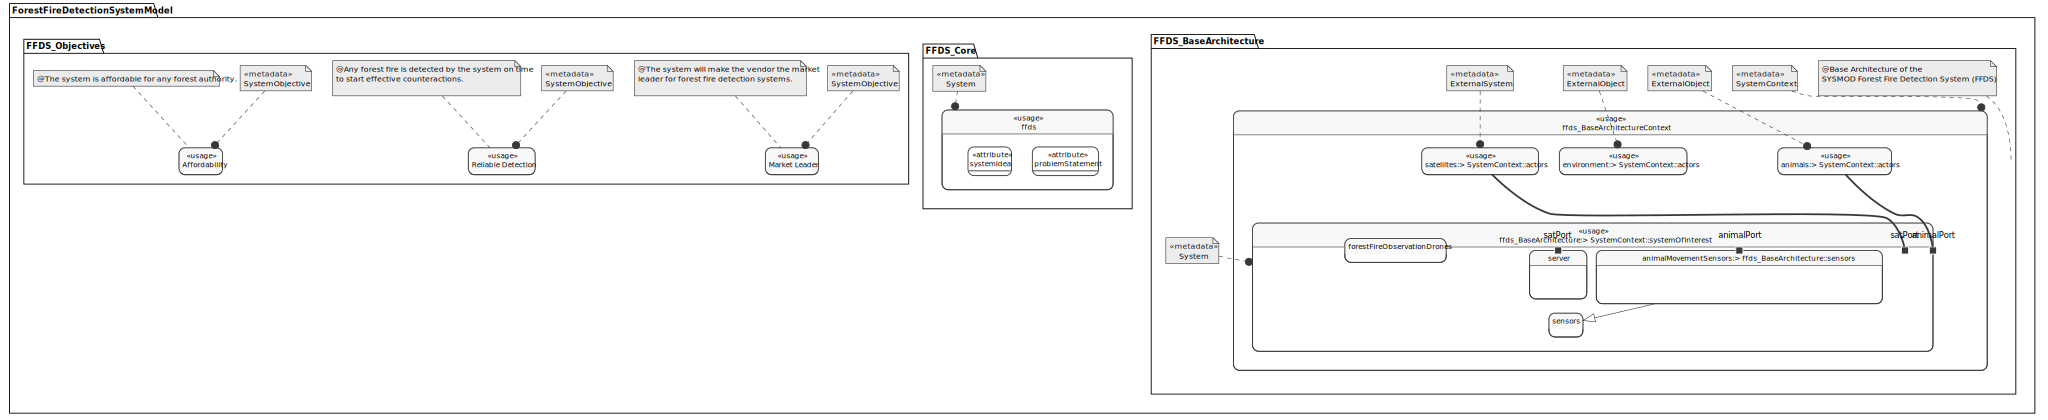

In [18]:
%viz ForestFireDetectionSystemModel